The link to the dataset: https://archive.ics.uci.edu/ml/datasets/online+retail.

In [47]:
# Importing necessary libraies.
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [49]:
# Loading our dataset.
df_retail = pd.read_excel('Online Retail.xlsx', index_col=None, engine='openpyxl')
print("The number of instances: ", len(df_retail))
print(df_retail.head())

The number of instances:  541909
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [50]:
df_retail.shape

(541909, 8)

In [51]:
print(df_retail.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [52]:
# Stipping off whitespaces from our columns if there are any.
df_retail.columns = df_retail.columns.str.strip()

In [53]:
# Remove all rows that have a NaN in the "Description".
df_retail = df_retail.dropna(subset=['Description'])

In [54]:
print(len(df_retail))

540455


In [55]:
# Check for exactly the same rows.
duplicate_rows = df_retail[df_retail.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 5268


In [56]:
# Check if the same item was bought multiple times in a single invoice
duplicates_within_invoices = df_retail[df_retail.duplicated(subset=['InvoiceNo', 'Description'])]
print(f"Number of duplicate items within invoices: {len(duplicates_within_invoices)}")

Number of duplicate items within invoices: 10869


In [57]:
print(duplicate_rows)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [58]:
# Remove duplicate rows
df_retail = df_retail.drop_duplicates()

In [59]:
# Remove duplicates within invoices while keeping one occurrence
df_retail = df_retail.drop_duplicates(subset=['InvoiceNo', 'Description'])

In [60]:
print(len(df_retail))

529586


In [61]:
# Casting the "Description" values to a string data type in order to clean the data further.
df_retail = df_retail.astype({"Description":'str'})

### Transforming the datasset into a format that can be processed with "mlxtend".

In [62]:
# Group the data into transactions using the 'InvoiceNo' column.
# Then transform the DataFrame into a list of lists, where each list contains the itemset assigned to a transaction.
trans = df_retail.groupby(['InvoiceNo'])['Description'].apply(list).to_list()
print(len(trans))

24446


In [63]:
# Transforming the data into a "one-hot encoded Boolean array".
encoder = TransactionEncoder()
encoded_array = encoder.fit(trans).transform(trans)
df_itemsets = pd.DataFrame(encoded_array, columns=encoder.columns_)

In [64]:
# To confirm that the original list of lists included 24446 transactions drawing on 24446 possible items.
print('Number of transactions: ', len(trans))
print('Number of unique items: ', len(set(sum(trans, []))))

Number of transactions:  24446
Number of unique items:  4223


In [65]:
# Identifying Frequent Itemsets
frequent_itemsets = apriori(df_itemsets, min_support=0.025, use_colnames=True)

In [66]:
print(frequent_itemsets)

      support                                           itemsets
0    0.039311                           (6 RIBBONS RUSTIC CHARM)
1    0.025444                  (60 CAKE CASES VINTAGE CHRISTMAS)
2    0.034198                      (60 TEATIME FAIRY CAKE CASES)
3    0.025321                   (72 SWEETHEART FAIRY CAKE CASES)
4    0.040947                       (ALARM CLOCK BAKELIKE GREEN)
..        ...                                                ...
131  0.027939  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...
132  0.029984  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)
133  0.026507  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
134  0.025076  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...
135  0.025117  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...

[136 rows x 2 columns]


In [67]:
# To view only those itemsets with multiple items.
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda itemset: len(itemset))
print(frequent_itemsets[frequent_itemsets['length'] >= 2])

      support                                           itemsets  length
127  0.026426  (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...       2
128  0.026344  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...       2
129  0.032071  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...       2
130  0.034075  (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...       2
131  0.027939  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...       2
132  0.029984  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)       2
133  0.026507  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...       2
134  0.025076  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...       2
135  0.025117  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...       2


In [68]:
print(frequent_itemsets[['itemsets', 'support', 'length']])

                                              itemsets   support  length
0                             (6 RIBBONS RUSTIC CHARM)  0.039311       1
1                    (60 CAKE CASES VINTAGE CHRISTMAS)  0.025444       1
2                        (60 TEATIME FAIRY CAKE CASES)  0.034198       1
3                     (72 SWEETHEART FAIRY CAKE CASES)  0.025321       1
4                         (ALARM CLOCK BAKELIKE GREEN)  0.040947       1
..                                                 ...       ...     ...
131  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...  0.027939       2
132  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)  0.029984       2
133  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...  0.026507       2
134  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...  0.025076       2
135  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...  0.025117       2

[136 rows x 3 columns]


In [69]:
# Generating Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print(rules.iloc[:,0:7])

                            antecedents                          consequents  \
0           (ALARM CLOCK BAKELIKE RED )         (ALARM CLOCK BAKELIKE GREEN)   
1          (ALARM CLOCK BAKELIKE GREEN)          (ALARM CLOCK BAKELIKE RED )   
2      (PINK REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
3     (GREEN REGENCY TEACUP AND SAUCER)     (PINK REGENCY TEACUP AND SAUCER)   
4     (GREEN REGENCY TEACUP AND SAUCER)   (ROSES REGENCY TEACUP AND SAUCER )   
5    (ROSES REGENCY TEACUP AND SAUCER )    (GREEN REGENCY TEACUP AND SAUCER)   
6             (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
7             (JUMBO BAG RED RETROSPOT)            (JUMBO BAG PINK POLKADOT)   
8   (JUMBO SHOPPER VINTAGE RED PAISLEY)            (JUMBO BAG RED RETROSPOT)   
9             (JUMBO BAG RED RETROSPOT)  (JUMBO SHOPPER VINTAGE RED PAISLEY)   
10             (JUMBO STORAGE BAG SUKI)            (JUMBO BAG RED RETROSPOT)   
11            (JUMBO BAG RED RETROSPOT) 

In [70]:
# To see our DataFrame in descending order of "Lift" values
print(len(rules))
print(rules.iloc[:,0:7].sort_values(by='lift', ascending=False))

18
                            antecedents                          consequents  \
2      (PINK REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
3     (GREEN REGENCY TEACUP AND SAUCER)     (PINK REGENCY TEACUP AND SAUCER)   
17   (ROSES REGENCY TEACUP AND SAUCER )     (PINK REGENCY TEACUP AND SAUCER)   
16     (PINK REGENCY TEACUP AND SAUCER)   (ROSES REGENCY TEACUP AND SAUCER )   
4     (GREEN REGENCY TEACUP AND SAUCER)   (ROSES REGENCY TEACUP AND SAUCER )   
5    (ROSES REGENCY TEACUP AND SAUCER )    (GREEN REGENCY TEACUP AND SAUCER)   
1          (ALARM CLOCK BAKELIKE GREEN)          (ALARM CLOCK BAKELIKE RED )   
0           (ALARM CLOCK BAKELIKE RED )         (ALARM CLOCK BAKELIKE GREEN)   
15            (LUNCH BAG PINK POLKADOT)            (LUNCH BAG RED RETROSPOT)   
14            (LUNCH BAG RED RETROSPOT)            (LUNCH BAG PINK POLKADOT)   
6             (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
7             (JUMBO BAG RED RETROSPO

### Creating Visualizations for better understanding.

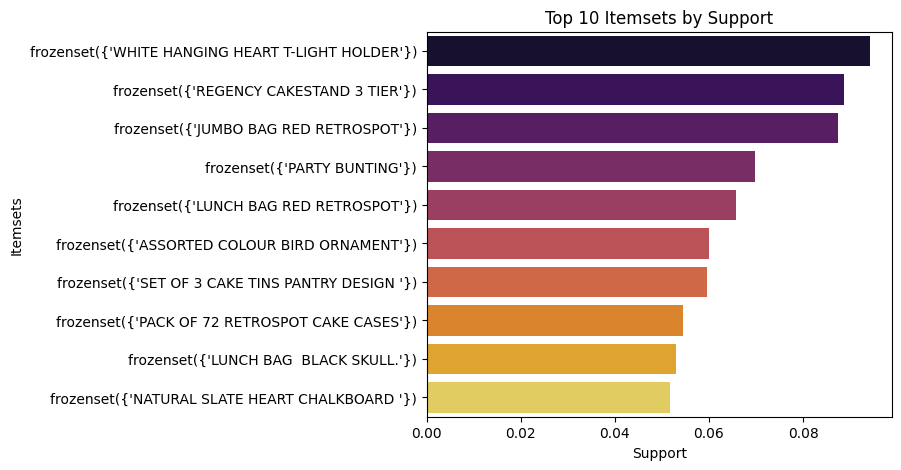

In [71]:
# Bar Chart of Support Values.
# Plotting the top 10 itemsets by support.
top_itemsets = frequent_itemsets.nlargest(10, 'support')

plt.figure(figsize=(6, 5))
sns.barplot(x='support', y='itemsets', data=top_itemsets, hue='itemsets', legend=False, palette='inferno')
plt.title('Top 10 Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


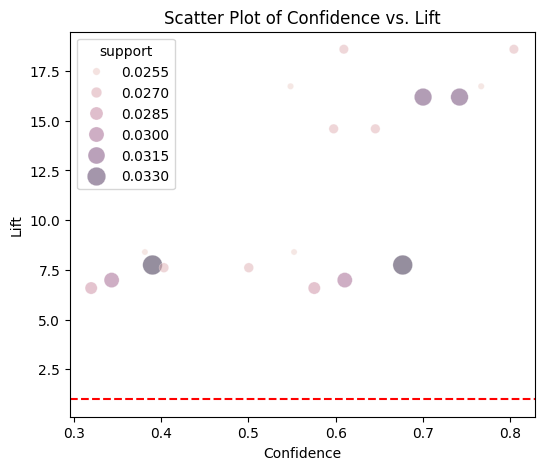

In [72]:
# Scatter Plot of Confidence vs. Lift.
plt.figure(figsize=(6, 5))
sns.scatterplot(data=rules, x='confidence', y='lift', hue='support', size='support', sizes=(20, 200), alpha=0.5)
plt.title('Scatter Plot of Confidence vs. Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.axhline(y=1, color='r', linestyle='--')  # Reference line for lift
plt.show()

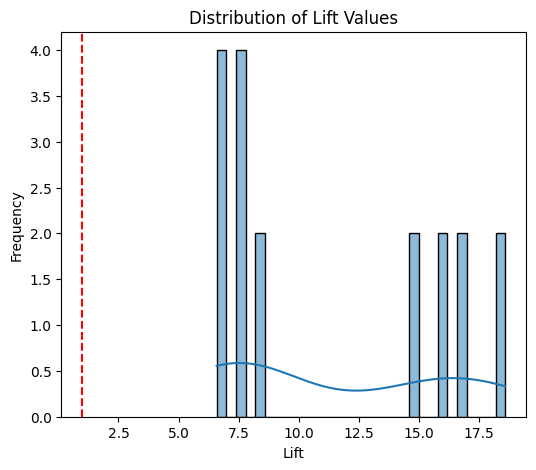

In [73]:
# Histogram of Lift Values.
plt.figure(figsize=(6, 5))
sns.histplot(rules['lift'], bins=30, kde=True)
plt.title('Distribution of Lift Values')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.axvline(x=1, color='r', linestyle='--')  # Reference line for lift
plt.show()

### Creating a discount plan

In [74]:
# Filter rules for potential discount strategies
def create_discount_plan(rules, lift_threshold=5.0, confidence_threshold=0.4):
    discount_plan = rules[(rules['lift'] > lift_threshold) & (rules['confidence'] > confidence_threshold)]
    return discount_plan

In [75]:
# Create the discount plan
discount_plan = create_discount_plan(rules)

# Display the discount plan
print(len(discount_plan))
print("Discount Plan Based on Association Rules:")
print(discount_plan[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

14
Discount Plan Based on Association Rules:
                            antecedents                         consequents  \
0           (ALARM CLOCK BAKELIKE RED )        (ALARM CLOCK BAKELIKE GREEN)   
1          (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED )   
2      (PINK REGENCY TEACUP AND SAUCER)   (GREEN REGENCY TEACUP AND SAUCER)   
3     (GREEN REGENCY TEACUP AND SAUCER)    (PINK REGENCY TEACUP AND SAUCER)   
4     (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER )   
5    (ROSES REGENCY TEACUP AND SAUCER )   (GREEN REGENCY TEACUP AND SAUCER)   
6             (JUMBO BAG PINK POLKADOT)           (JUMBO BAG RED RETROSPOT)   
8   (JUMBO SHOPPER VINTAGE RED PAISLEY)           (JUMBO BAG RED RETROSPOT)   
10             (JUMBO STORAGE BAG SUKI)           (JUMBO BAG RED RETROSPOT)   
12            (LUNCH BAG RED RETROSPOT)           (LUNCH BAG  BLACK SKULL.)   
13            (LUNCH BAG  BLACK SKULL.)           (LUNCH BAG RED RETROSPOT)   
15     

In [76]:
# Additional recommendations based on discount plan
def recommend_discounts(discount_plan):
    recommendations = []
    for purchased_items, row in discount_plan.iterrows():
        recommendations.append(f"Offer a discount on {list(row['consequents'])[0]} when purchasing {list(row['antecedents'])[0]}.")
    return recommendations

In [77]:
# Generate discount recommendations
discount_recommendations = recommend_discounts(discount_plan)

# Print the recommendations
print(f"Total Recommendations are: {len(discount_recommendations)}")
print("\nRecommended Discounts:")
if discount_recommendations:
    for index, recommendation in enumerate(discount_recommendations, start=1):
        print(f"{index}. {recommendation}")
else:
    print("No recommendations available.")

Total Recommendations are: 14

Recommended Discounts:
1. Offer a discount on ALARM CLOCK BAKELIKE GREEN when purchasing ALARM CLOCK BAKELIKE RED .
2. Offer a discount on ALARM CLOCK BAKELIKE RED  when purchasing ALARM CLOCK BAKELIKE GREEN.
3. Offer a discount on GREEN REGENCY TEACUP AND SAUCER when purchasing PINK REGENCY TEACUP AND SAUCER.
4. Offer a discount on PINK REGENCY TEACUP AND SAUCER when purchasing GREEN REGENCY TEACUP AND SAUCER.
5. Offer a discount on ROSES REGENCY TEACUP AND SAUCER  when purchasing GREEN REGENCY TEACUP AND SAUCER.
6. Offer a discount on GREEN REGENCY TEACUP AND SAUCER when purchasing ROSES REGENCY TEACUP AND SAUCER .
7. Offer a discount on JUMBO BAG RED RETROSPOT when purchasing JUMBO BAG PINK POLKADOT.
8. Offer a discount on JUMBO BAG RED RETROSPOT when purchasing JUMBO SHOPPER VINTAGE RED PAISLEY.
9. Offer a discount on JUMBO BAG RED RETROSPOT when purchasing JUMBO STORAGE BAG SUKI.
10. Offer a discount on LUNCH BAG  BLACK SKULL. when purchasing LUNCH B